In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from helper_functions import graph
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# Parkinson's Disease Classification EDA

Here we would like to uncover a lot about the data as the documentation for the data is rather blank aside from the study this stems from.

In [2]:
raw_df = pd.read_csv("/Users/marko/Parkinson_Classification/data/raw/pd_speech_features.csv", header=1)
raw_df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


755 features! A cursory glance yields that it looks like lots of these features were one-hot encoded or time series were placed in separate columns which is quite interesting. Anyhow, continuing with our analysis:

In [4]:
raw_df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


Alright, nothing particularly meaningful or interesting coming from these routine checks. Although I will be interested in looking at say the class of variables indexed by time to see if there's any discrepency. The other thing to note is just simply looking at the features most correlated to the outcome as opposed to the features cited in the paper. The baseline features that were most popular according to the paper below are: Jitter, shimmer, fundamental frequency parameters, harmonicity parameters, RPDE, DFA, and PPE. 

In [5]:
corr_mat = raw_df.drop("class", axis=1).apply(lambda col: col.corr(raw_df["class"],
                                                                   method="spearman"))

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


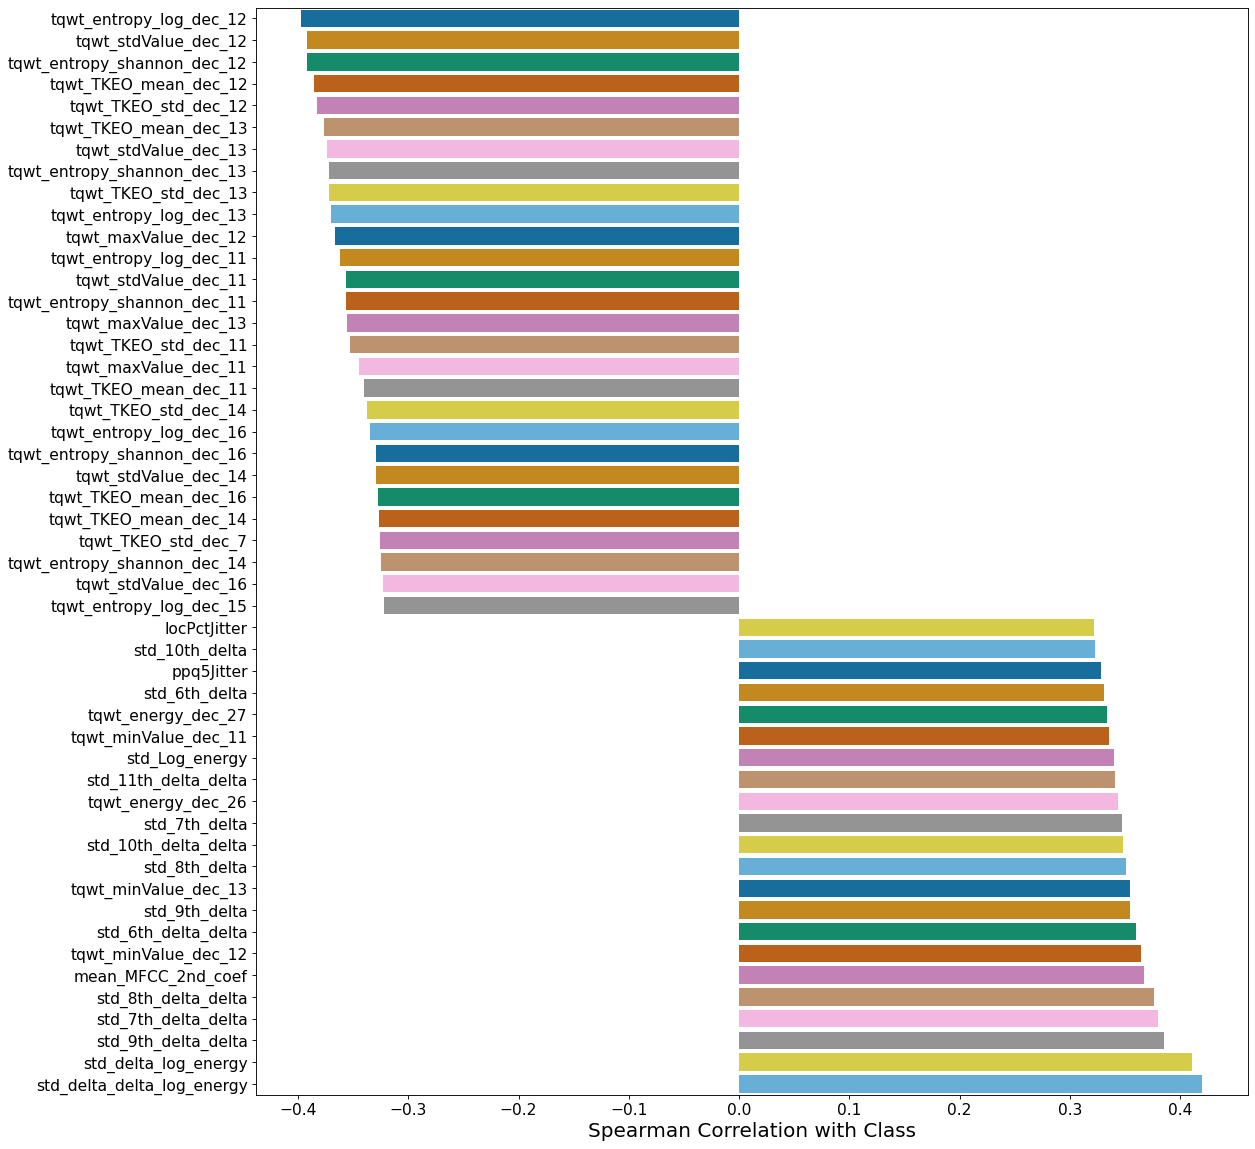

In [6]:
# 50 largest correlations in absolute value
largest_corr = corr_mat.iloc[corr_mat.abs().argsort()][-50:].sort_values(ascending=True)
graph.barplot(largest_corr,
              savefig=True, 
              title=None,
              xlab='Spearman Correlation with Class')
plt.savefig("./figs/spearman_corr_to_class.png", bbox_inches="tight")

I see some of the features mentioned in the paper - jitter, fundamental frequency parameters, and quite a lot of the time-series elements are all negatively correlated. However we need to test significance of time trends in the entropy, TKEO, and stdValue features to see if we can perhaps combine these to condense the data down.

In [7]:
def na_pct(col):
    return len(col[col.isna()]) / len(col)

na_pcts = raw_df.apply(na_pct, axis=0)
na_pcts[na_pcts != 0]

Series([], dtype: float64)

There is no missing data in any of the columns surprisingly. We can also check for duplicate IDs. 

In [8]:
raw_df["id"].value_counts().unique()

array([3])

Okay, so it appears as though each patient was scanned three times. Let us check to see if these scans were consistent for all patients - it would be surprising if the outcome for some patients changed over different measurements. Let us see:

In [9]:
# look at variance of outcome - if not zero, then there's another 
id_var = raw_df.groupby("id")["class"].var()
id_var[id_var != 0]

Series([], Name: class, dtype: float64)

That's a good sanity check - there's no variance in the outcomes for data with the same IDs. However, the variances for other features such as "PPE" are nonzero, so these columns are not immediately redundant; however, it begs the question of the difference training with all three data samples per ID or getting the mean or just the first, second or third. Immediately, I do not see a problem with keeping all points for training as every ID has three entries, so no unnatural weightings towards classes or feature subsets should stem from such. Now as there are 700+ features, dimension reduction would prove quite useful. 

## Dimension Reduction

Here we can test out a few ways of finding the spectra (hopefully a subset of the data). For starters, PCA and NMF should suffice.

/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


Text(0, 0.5, 'Cumulative Explained Variance %')

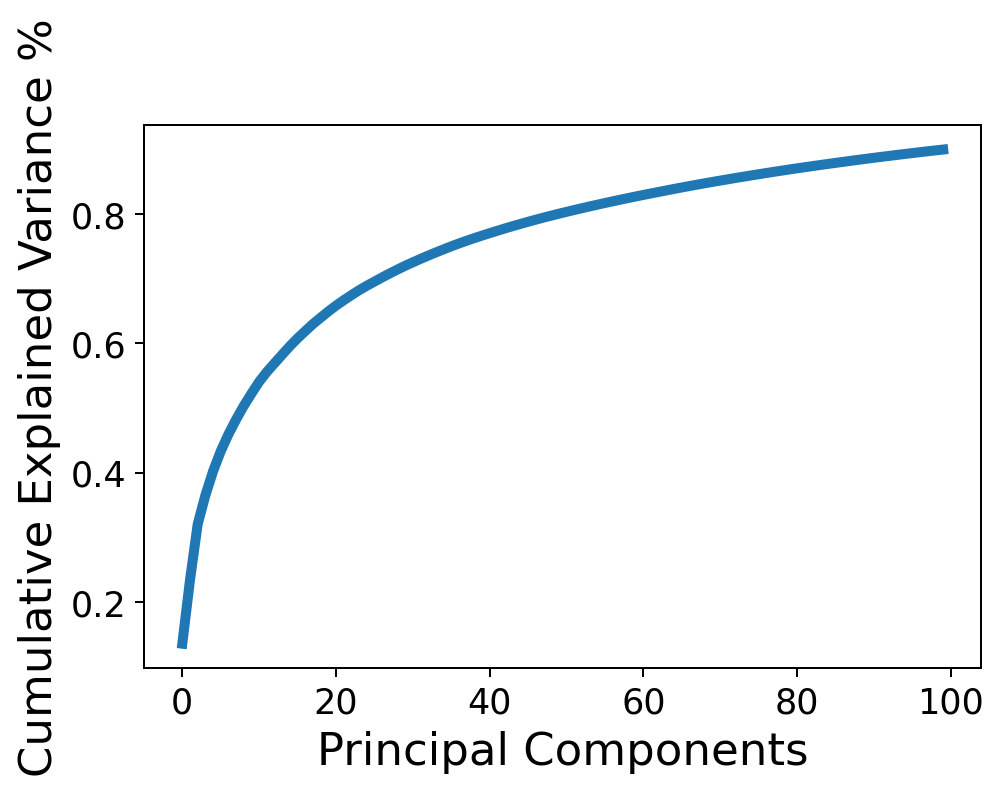

In [11]:
X = scale(raw_df.drop(columns="class"))
y = raw_df["class"]
pca = PCA(n_components=100)
pca.fit(X)
explained_var_pct = pca.explained_variance_ratio_.cumsum()
plt.plot(explained_var_pct)
plt.xlabel("Principal Components")
plt.ylabel("Cumulative Explained Variance %")

I'd say the first 50 or so appear to be worth investigating while still encompassing 80% of the explained variance. Let us look at the loadings for the first component to get a sense of what really is driving the variance of the data.

In [39]:
pc = pd.DataFrame(pca.components_.T)
pc.index = raw_df.columns.tolist()[:-1]
pc.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
id,0.007349,0.001132,0.006452,-0.014835,0.022944,0.021611,0.024232,-0.006301,0.013322,-0.015983,...,-0.027568,0.263132,0.069848,-0.090017,-0.042471,0.050749,-0.069503,0.029764,-0.113186,0.087394
gender,-0.045027,0.047046,-0.006212,0.024559,-0.010382,0.008454,-0.000037,0.062627,0.033354,-0.009263,...,-0.020719,0.029779,0.008985,-0.021278,0.038091,0.006459,0.016725,0.017709,0.012542,-0.005105
PPE,0.017373,0.010533,-0.057733,0.012775,0.005156,0.023446,0.026188,0.003658,0.058832,-0.047416,...,-0.033543,0.008746,-0.011118,0.012613,0.111420,-0.012671,-0.035574,0.071365,0.012960,0.091402
DFA,-0.049226,0.002465,0.001533,-0.063797,0.072177,-0.039507,0.021506,-0.039399,-0.003817,0.043921,...,-0.036488,0.034092,-0.025568,0.017634,-0.044195,0.009761,0.046603,0.005819,-0.013302,0.060725
RPDE,-0.055008,0.004513,0.049559,0.018954,0.005163,0.010158,-0.050073,-0.034126,-0.044206,0.002751,...,-0.018828,-0.045938,0.003510,0.036327,0.002207,-0.033391,0.024527,0.033391,-0.017212,-0.012370


In [40]:
pc[0].abs().sort_values(ascending=False)[0:30]

app_LT_entropy_shannon_6_coef     0.081973
app_LT_entropy_shannon_5_coef     0.081957
app_LT_TKEO_mean_10_coef          0.081902
app_LT_entropy_shannon_7_coef     0.081891
app_LT_TKEO_std_10_coef           0.081883
app_LT_TKEO_std_9_coef            0.081862
app_LT_TKEO_mean_9_coef           0.081787
app_LT_TKEO_mean_8_coef           0.081773
app_LT_entropy_shannon_10_coef    0.081696
app_LT_entropy_shannon_8_coef     0.081692
app_LT_entropy_shannon_9_coef     0.081692
app_LT_TKEO_std_7_coef            0.081498
app_LT_entropy_shannon_4_coef     0.081482
app_LT_TKEO_std_8_coef            0.081352
app_LT_TKEO_mean_7_coef           0.081144
app_LT_entropy_log_8_coef         0.081141
app_LT_entropy_log_9_coef         0.081140
app_LT_entropy_log_10_coef        0.081135
app_entropy_log_8_coef            0.081087
app_entropy_log_9_coef            0.081083
app_entropy_log_10_coef           0.081045
app_entropy_log_7_coef            0.080904
app_entropy_log_6_coef            0.080733
app_LT_TKEO

From here, we get a sense of some of the important features by the first PC and the largest loadings within the first component. Notably, we see that the shannon entropy, log entropy, and TKEO mean/std and their deviations play an important role in explaining the variance. 

I still have the question: what is the difference between app_LT_entropy_shannon_i_coef and tqwt_entropy_shannon_date. As the former explains more of the variance of the data while the latter is more correlated with the outcome. 

In [5]:
# grab the features with shannon in the name
shannon_feats = [column for column in raw_df.columns.tolist() if "shannon" in column]


# grab the features with TKEO in the name
tkeo_feats = [column for column in raw_df.columns.tolist() if "TKEO" in column]

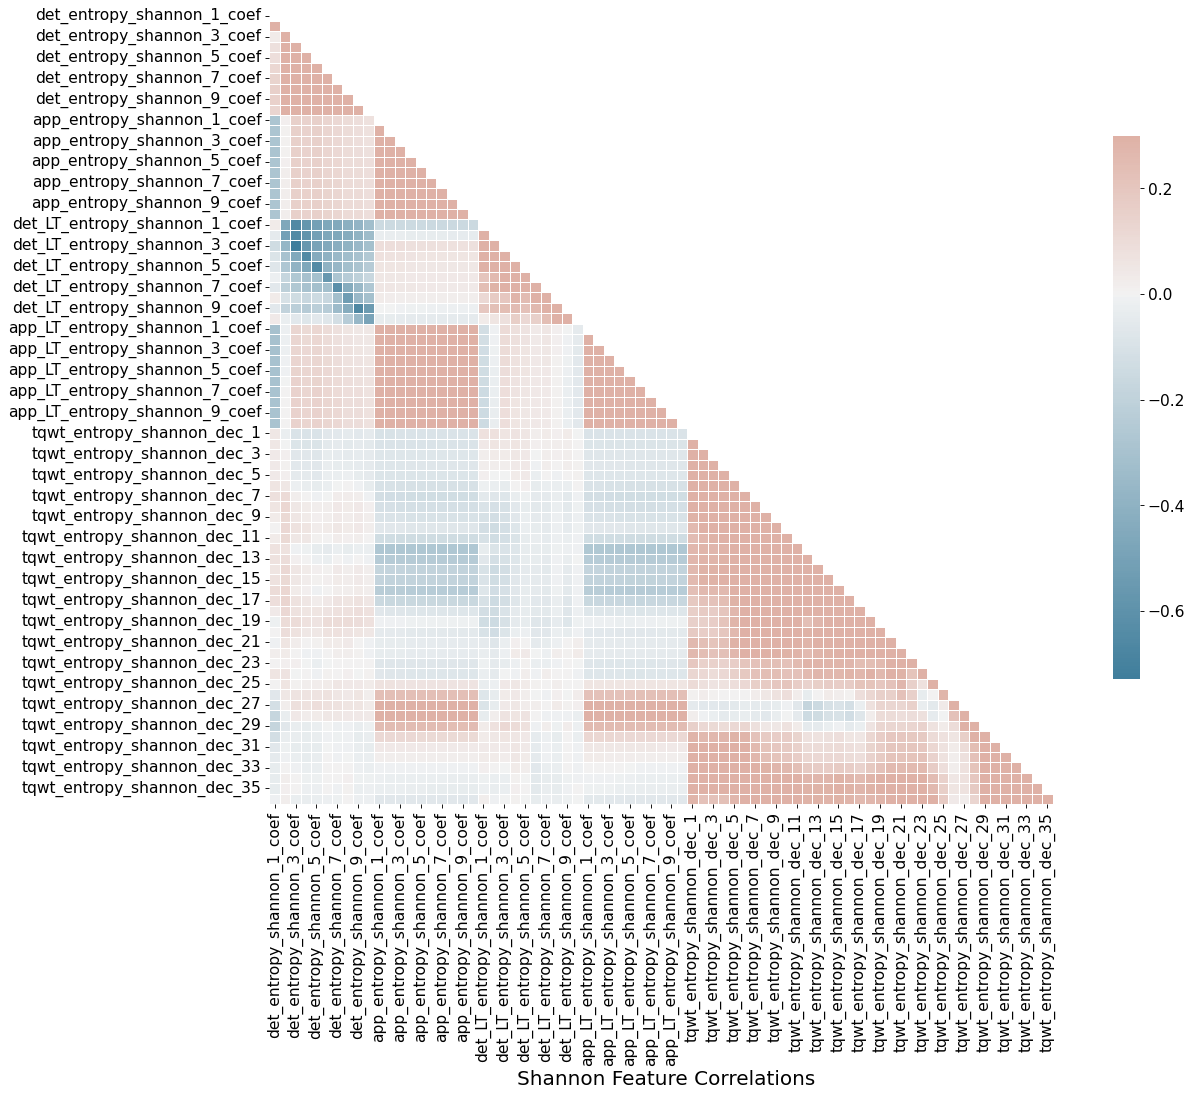

In [4]:
shannon_corr = raw_df[shannon_feats].corr(method='kendall')

graph.sns_corrplot(shannon_corr,
              savefig=True, 
              title=None,
              xlab='Shannon Feature Correlations')
plt.savefig("./figs/shannon_feat_corr.png", bbox_inches="tight")

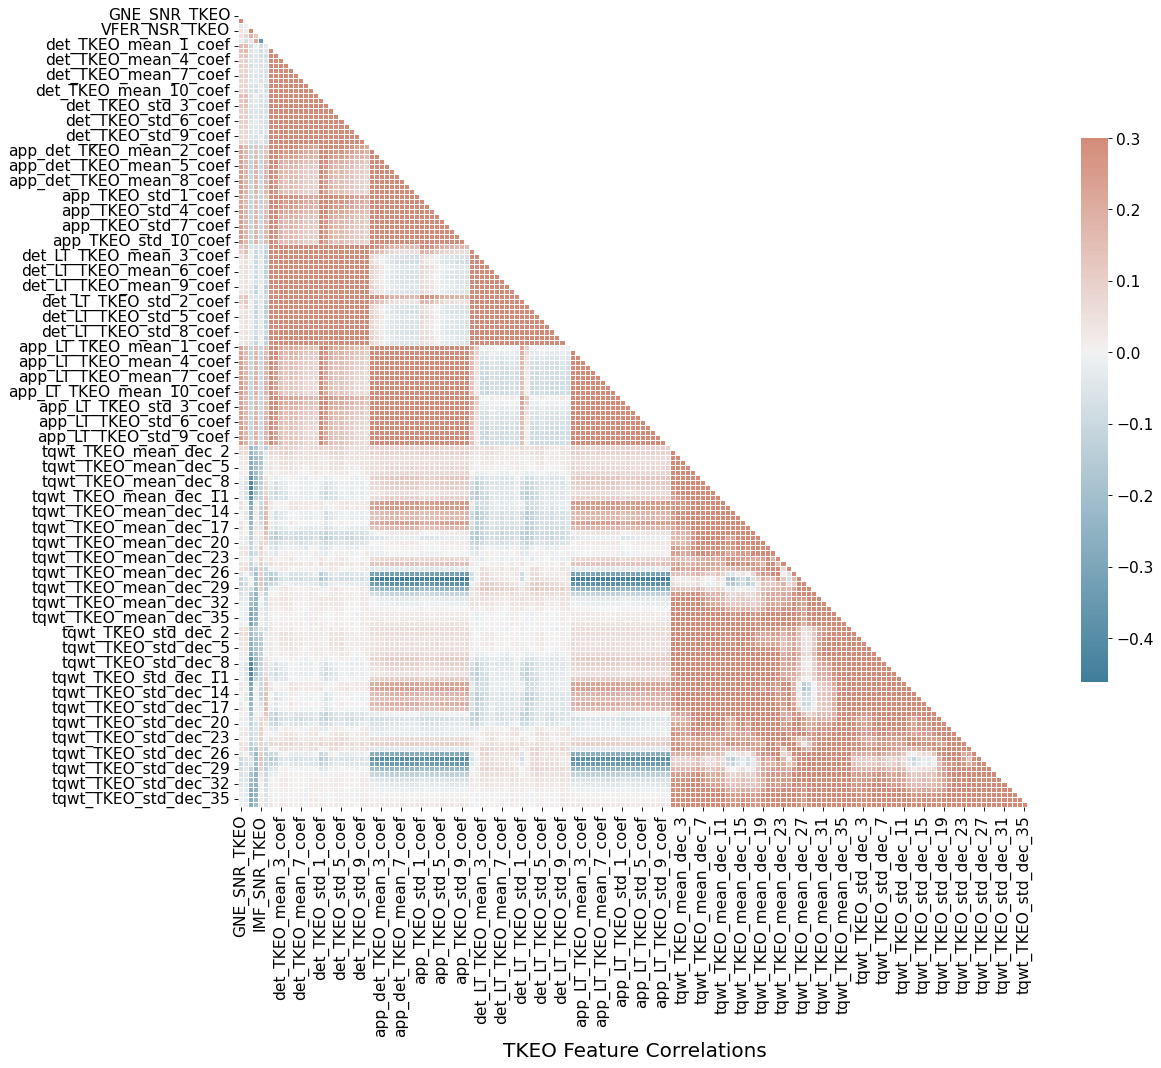

In [6]:
tkeo_corr = raw_df[tkeo_feats].corr(method='kendall')

graph.sns_corrplot(tkeo_corr,
              savefig=True, 
              title=None,
              xlab='TKEO Feature Correlations')
plt.savefig("./figs/tkeo_feat_corr.png", bbox_inches="tight")

# Sources

The seminal paper is given here: https://www.sciencedirect.com/science/article/pii/S1568494618305799?via%3Dihub